In [1]:
import requests
import lxml.html as lh
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
website_url = requests.get('https://www.basketball-reference.com/players/b/bealbr01/gamelog/2019')
soup = BeautifulSoup(website_url.content,'lxml')
soup.prettify()
My_table = soup.find('table',{'class':'row_summable sortable stats_table'})
tabledata = My_table.findAll('td')
data = []
for cell in tabledata:
    data.append(cell.get_text())

In [3]:
import numpy as np
data2 = np.array(data)
refined = np.reshape(data2, (-1, 29))
#refined

In [4]:
tableheader = My_table.findAll('th')
headers = []
count = 0
for item in tableheader:
    if (count < 30):
        headers.append(item.get_text())
        count=count+1
headers.remove('Rk')    
print(headers)

['G', 'Date', 'Age', 'Tm', '\xa0', 'Opp', '\xa0', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-']


In [38]:
import pandas as pd
df1 = pd.DataFrame(refined, columns=headers)

In [39]:
df1.tail()

,G,Date,Age,Tm,,Opp,,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
77,78,2019-03-31,25-276,WAS,@,DEN,W (+5),1,36:20,6,...,3,3,6,3,0,2,3,17,13.1,-10
78,79,2019-04-03,25-279,WAS,,CHI,L (-1),1,22:27,9,...,4,4,2,1,2,1,0,19,13.6,+5
79,80,2019-04-05,25-281,WAS,,SAS,L (-17),1,30:41,9,...,2,2,5,0,0,2,0,25,17.0,-11
80,81,2019-04-07,25-283,WAS,@,NYK,L (-3),1,23:26,5,...,3,3,5,1,0,1,2,13,6.7,+3
81,82,2019-04-09,25-285,WAS,,BOS,L (-6),1,16:32,6,...,3,5,4,0,0,0,0,16,15.8,+8


In [40]:
df1 = df1.drop(['\xa0', '\xa0', 'Tm', 'Age', 'GS'], axis=1)
df1.head()

,G,Date,Opp,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,2018-10-18,MIA,27:11,7,16,.438,2,7,.286,...,1,1,2,1,0,1,5,20,10.5,-6
1,2,2018-10-20,TOR,35:14,12,21,.571,6,11,.545,...,3,3,6,1,1,1,5,32,25.1,+3
2,3,2018-10-22,POR,43:05,10,25,.400,5,9,.556,...,7,8,7,0,1,0,3,25,18.3,+7
3,4,2018-10-24,GSW,19:25,10,15,.667,1,4,.250,...,3,3,4,1,0,0,3,23,20.0,-10
4,5,2018-10-26,SAC,39:01,6,19,.316,3,11,.273,...,5,5,0,2,0,5,5,21,6.6,-7


In [41]:
df1.columns

Index(['G', 'Date', 'Opp', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'GmSc', '+/-'],
      dtype='object')

## Correlation Matrix

#### There are a lot of features to look at here, so we will will start our predictive analysis by looking at how features are correlated to each other, and what features are the most important for predicting future stats

In [57]:
df2 = df1.drop(['Date', 'Opp', 'MP', '+/-'], axis=1)

In [58]:
df2['PT'] = df2['PTS']
df2 = df2.drop(['PTS'], axis=1)
df2['PTS'] = df2['PT']
df2 = df2.drop(['PT'], axis=1)
df2.head()

,G,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,GmSc,PTS
0,1,7,16,.438,2,7,.286,4,6,.667,0,1,1,2,1,0,1,5,10.5,20
1,2,12,21,.571,6,11,.545,2,4,.500,0,3,3,6,1,1,1,5,25.1,32
2,3,10,25,.400,5,9,.556,0,1,.000,1,7,8,7,0,1,0,3,18.3,25
3,4,10,15,.667,1,4,.250,2,2,1.000,0,3,3,4,1,0,0,3,20.0,23
4,5,6,19,.316,3,11,.273,6,6,1.000,0,5,5,0,2,0,5,5,6.6,21


In [59]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
cols = df2.columns
sc2 = StandardScaler()
for col in cols:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
    df2[[col]] = sc2.fit_transform(df2[[col]])

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

AxesSubplot(0.127273,0.125;0.617727x0.755)


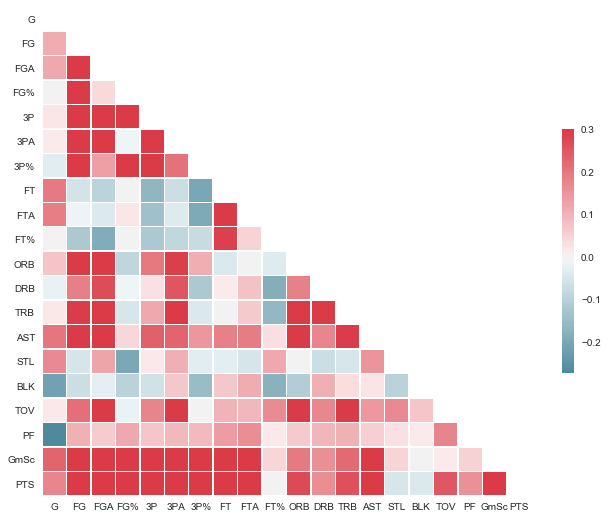

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df2

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

In [46]:
df3 = df2.copy(deep=True)
df3['PTS'] = df2.PTS.shift(-1)
df3 = df3.dropna()
df3.head()

,G,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,GmSc,PTS
0,-1.711055,-0.779921,-0.751793,-0.347639,-0.334806,-0.102656,-0.326419,-0.140722,0.156466,-0.618649,-0.841535,-1.386195,-1.504732,-1.152607,-0.374222,-0.820244,-0.933645,1.526774,-1.162305,0.873660
1,-1.668807,0.903066,0.286036,0.943252,2.105559,1.427850,1.279812,-0.819498,-0.426725,-1.386890,-0.841535,-0.438962,-0.754653,0.178573,-0.374222,0.339411,-0.933645,1.526774,0.818212,-0.081542
2,-1.626559,0.229871,1.116298,-0.716465,1.495468,0.662597,1.348030,-1.498275,-1.301511,-3.687016,-0.066188,1.455505,1.120545,0.511368,-1.161049,0.339411,-1.472792,0.165954,-0.104220,-0.354456
3,-1.584311,0.229871,-0.959358,1.875023,-0.944898,-1.250536,-0.549679,-0.819498,-1.009915,0.913235,-0.841535,-0.438962,-0.754653,-0.487017,-0.374222,-0.820244,-1.472792,0.165954,0.126388,-0.627371
4,-1.542062,-1.116518,-0.129096,-1.531764,0.275285,1.427850,-0.407041,0.538054,0.156466,0.913235,-0.841535,0.508272,-0.004574,-1.818196,0.412604,-0.820244,1.222943,1.526774,-1.691347,-0.763829


AxesSubplot(0.127273,0.125;0.617727x0.755)


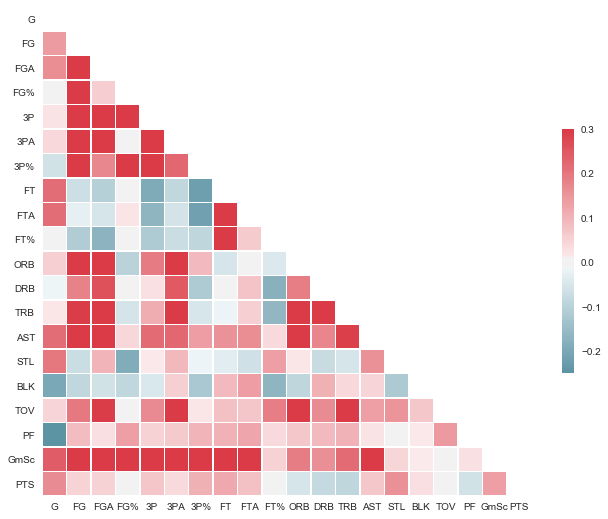

In [14]:
sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

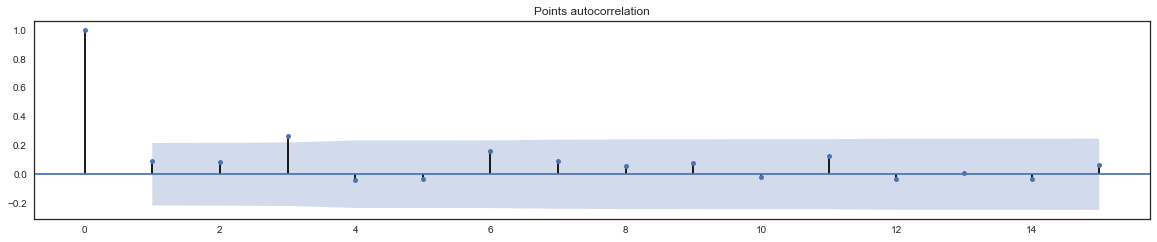

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df2.PTS, lags=15, ax=ax1, title= 'Points autocorrelation')

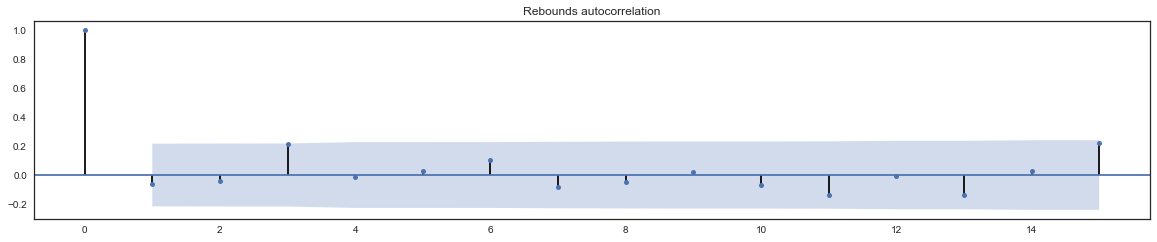

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df2.TRB, lags=15, ax=ax1, title='Rebounds autocorrelation')

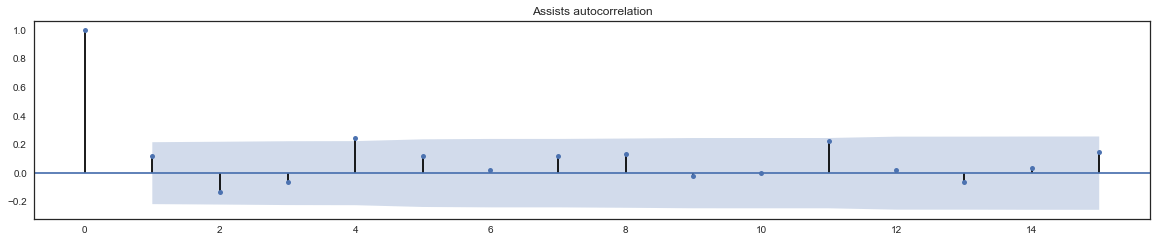

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df2.AST, lags=15, ax=ax1, title='Assists autocorrelation')

### Trend analysis

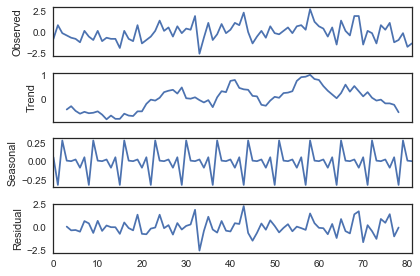

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
result = seasonal_decompose(df2.PTS, model='additive', freq=7)
result.plot()
plt.show()

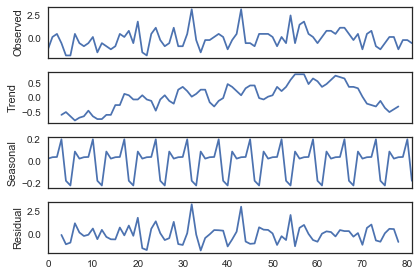

In [19]:
result = seasonal_decompose(df2.AST, model='additive', freq=7)
result.plot()
plt.show()

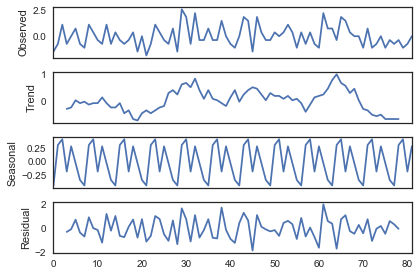

In [20]:
result = seasonal_decompose(df2.TRB, model='additive', freq=7)
result.plot()
plt.show()

In [61]:
df2['Date'] = df1['Date']
df2['Opp'] = df1['Opp']

In [62]:
df2.head()

,G,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,TRB,AST,STL,BLK,TOV,PF,GmSc,PTS,Date,Opp
0,-1.711055,-0.779921,-0.751793,-0.347639,-0.334806,-0.102656,-0.326419,-0.140722,0.156466,-0.618649,...,-1.504732,-1.152607,-0.374222,-0.820244,-0.933645,1.526774,-1.162305,-0.763829,2018-10-18,MIA
1,-1.668807,0.903066,0.286036,0.943252,2.105559,1.427850,1.279812,-0.819498,-0.426725,-1.386890,...,-0.754653,0.178573,-0.374222,0.339411,-0.933645,1.526774,0.818212,0.873660,2018-10-20,TOR
2,-1.626559,0.229871,1.116298,-0.716465,1.495468,0.662597,1.348030,-1.498275,-1.301511,-3.687016,...,1.120545,0.511368,-1.161049,0.339411,-1.472792,0.165954,-0.104220,-0.081542,2018-10-22,POR
3,-1.584311,0.229871,-0.959358,1.875023,-0.944898,-1.250536,-0.549679,-0.819498,-1.009915,0.913235,...,-0.754653,-0.487017,-0.374222,-0.820244,-1.472792,0.165954,0.126388,-0.354456,2018-10-24,GSW
4,-1.542062,-1.116518,-0.129096,-1.531764,0.275285,1.427850,-0.407041,0.538054,0.156466,0.913235,...,-0.004574,-1.818196,0.412604,-0.820244,1.222943,1.526774,-1.691347,-0.627371,2018-10-26,SAC


In [63]:
#do MJ prediction/Do a team(GSW?) prediction/collegetoNBA

In [64]:
df2['Date'] = pd.to_datetime(df2['Date'])
#df2['Year'] = df2['Date'].dt.year
#df2['Month'] = df2['Date'].dt.month
#df2['Week'] = df2['Date'].dt.week
#df2['Yearday'] = df2['Date'].dt.dayofyear
df2['Rest'] = df2['Date'].dt.dayofyear.diff()%365
df2 = df2.dropna()

In [65]:
df2.head()

,G,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,AST,STL,BLK,TOV,PF,GmSc,PTS,Date,Opp,Rest
1,-1.668807,0.903066,0.286036,0.943252,2.105559,1.427850,1.279812,-0.819498,-0.426725,-1.386890,...,0.178573,-0.374222,0.339411,-0.933645,1.526774,0.818212,0.873660,2018-10-20,TOR,2.0
2,-1.626559,0.229871,1.116298,-0.716465,1.495468,0.662597,1.348030,-1.498275,-1.301511,-3.687016,...,0.511368,-1.161049,0.339411,-1.472792,0.165954,-0.104220,-0.081542,2018-10-22,POR,2.0
3,-1.584311,0.229871,-0.959358,1.875023,-0.944898,-1.250536,-0.549679,-0.819498,-1.009915,0.913235,...,-0.487017,-0.374222,-0.820244,-1.472792,0.165954,0.126388,-0.354456,2018-10-24,GSW,2.0
4,-1.542062,-1.116518,-0.129096,-1.531764,0.275285,1.427850,-0.407041,0.538054,0.156466,0.913235,...,-1.818196,0.412604,-0.820244,1.222943,1.526774,-1.691347,-0.627371,2018-10-26,SAC,2.0
5,-1.499814,-0.443323,-0.751793,0.254130,-0.944898,-0.485282,-1.064418,-0.480110,-0.135130,-0.926865,...,-1.818196,-1.161049,0.339411,0.144649,0.165954,-1.203000,-0.763829,2018-10-28,LAC,2.0


In [66]:
df2 = df2.drop(['Date'], axis=1)

In [67]:
df2.columns

Index(['G', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc', 'PTS', 'Opp',
       'Rest'],
      dtype='object')

In [68]:
#Do prediction for pts, reb, ast

In [87]:
df4 = df2.copy(deep=True)
df4['Opp'] = df4.Opp.shift(-1)
#df4['Year'] = df4.Year.shift(-1)
#df4['Month'] = df4.Month.shift(-1)
#df4['Week'] = df4.Week.shift(-1)
#df4['Yearday'] = df4.Yearday.shift(-1)
df4['Rest'] = df4.Rest.shift(-1)

In [30]:
BradleyBealStatLog = df4.copy(deep=True)
BradleyBealStatLog.to_csv('BradleyBealStatLog.csv')

In [56]:
dum1 = pd.get_dummies(df4['Opp'])
df4 = pd.concat([df4, dum1], axis=1)
df4 = df4.drop(['Opp'], axis=1)

In [88]:
df4.columns

Index(['G', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc', 'PTS', 'Opp',
       'Rest'],
      dtype='object')

In [89]:
standings = ['ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET', 'GSW',
       'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK',
       'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA']
rankings = [27, 4, 23, 24, 20, 6, 28, 14, 19, 3, 1, 8, 18, 21, 29, 15, 16, 12, 9, 22, 10, 26, 5, 30, 7, 25, 13, 2, 11]

In [90]:
for x in range(29):
    df4 = df4.replace(standings[x],rankings[x])

In [91]:
df4['PredPts'] = df4.PTS.shift(-1)
df4['PredTrb'] = df4.TRB.shift(-1)
df4['PredAst'] = df4.AST.shift(-1)
df4 = df4.dropna()

In [92]:
df4.columns

Index(['G', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc', 'PTS', 'Opp',
       'Rest', 'PredPts', 'PredTrb', 'PredAst'],
      dtype='object')

In [93]:
df4 = df4.drop(['DRB', 'TRB','ORB','PF','TOV','FG%'], axis=1)
#df4 = df4.drop(['ATL', 'BOS', 'BRK', 'CHI', 'CHO','CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR','SAC', 'SAS', 'TOR', 'UTA', 'Year','Month', 'Week', 'Yearday'], axis=1)
#df4 = df4.drop(['G', 'FG%','3PA','FTA','ORB','DRB'], axis=1)
df4['Opp'] = df4['Opp']/30
df4['Rest'] = df4['Rest']/9
df4.head()

,G,FG,FGA,3P,3PA,3P%,FT,FTA,FT%,AST,STL,BLK,GmSc,PTS,Opp,Rest,PredPts,PredTrb,PredAst
1,-1.668807,0.903066,0.286036,2.105559,1.427850,1.279812,-0.819498,-0.426725,-1.386890,0.178573,-0.374222,0.339411,0.818212,0.873660,0.233333,0.222222,-0.081542,1.120545,0.511368
2,-1.626559,0.229871,1.116298,1.495468,0.662597,1.348030,-1.498275,-1.301511,-3.687016,0.511368,-1.161049,0.339411,-0.104220,-0.081542,0.100000,0.222222,-0.354456,-0.754653,-0.487017
3,-1.584311,0.229871,-0.959358,-0.944898,-1.250536,-0.549679,-0.819498,-1.009915,0.913235,-0.487017,-0.374222,-0.820244,0.126388,-0.354456,0.833333,0.222222,-0.627371,-0.004574,-1.818196
4,-1.542062,-1.116518,-0.129096,0.275285,1.427850,-0.407041,0.538054,0.156466,0.913235,-1.818196,0.412604,-0.820244,-1.691347,-0.627371,0.600000,0.222222,-0.763829,0.745506,-1.818196
5,-1.499814,-0.443323,-0.751793,-0.944898,-0.485282,-1.064418,-0.480110,-0.135130,-0.926865,-1.818196,-1.161049,0.339411,-1.203000,-0.763829,0.966667,0.222222,-1.173201,-0.754653,0.511368


In [98]:
#df4 = df4.sample(frac=1).reset_index(drop=True)
train=df4[0:(round(len(df4)*.9))] 
test=df4[(round(len(df4)*.9 - 1)):]
trains = np.split(train, [16], axis=1)
train_y=trains[1]
train_x=trains[0]
tests = np.split(test, [16], axis=1)
test_y=tests[1]
test_x=tests[0]

In [99]:
train_y.head()

,PredPts,PredTrb,PredAst
1,-0.081542,1.120545,0.511368
2,-0.354456,-0.754653,-0.487017
3,-0.627371,-0.004574,-1.818196
4,-0.763829,0.745506,-1.818196
5,-1.173201,-0.754653,0.511368


In [100]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

## Predicting Points

### Linear Regression

In [101]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.PredPts.values)
#reg.score(train_x.values, train_y.PredAst.values)

reg.coef_

array([ 0.34754345, -0.36080685,  0.26260076, -0.20284385, -0.01500588,
        0.23179181,  0.72780802, -0.84488739, -0.11893621, -0.13084121,
        0.02818907,  0.09285189,  0.31792728, -0.0452845 ,  0.34818154,
        1.66376219])

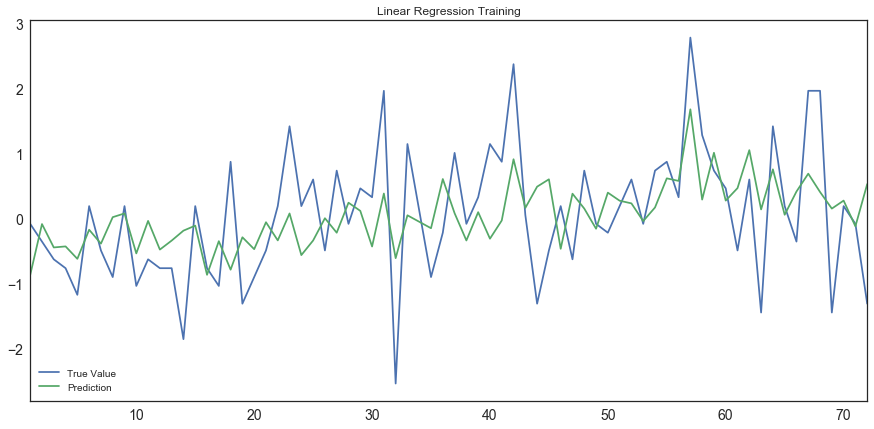

adj train r^2 = -0.0029491272411872327
train mse = 0.7742713632190211


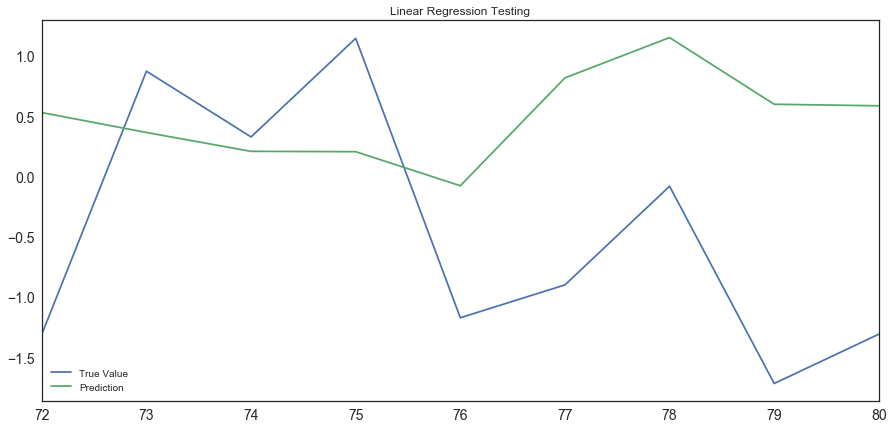

['G', 'FG', 'FGA', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'AST', 'STL', 'BLK', 'GmSc', 'PTS', 'Opp', 'Rest']
adj test r^2 = -1.8097688347885135
test mse = 2.1326484134638295


In [102]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['PredPts'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y['PredPts'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))

### Extra Trees

In [103]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.PredPts.values.ravel())

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

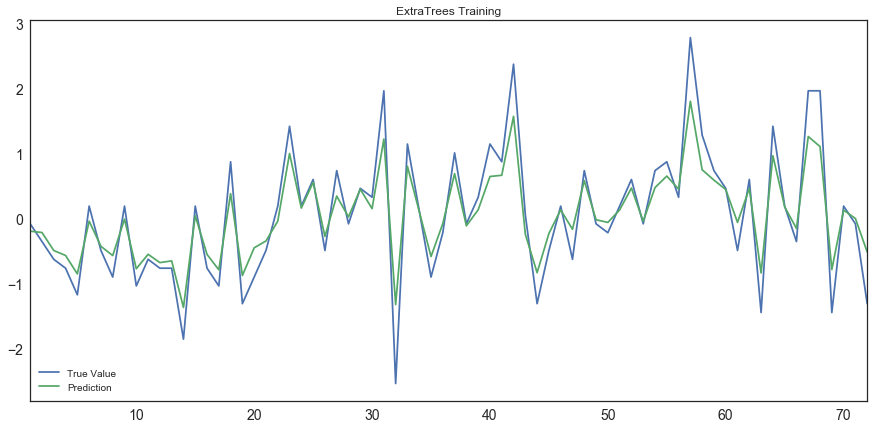

adj train r^2 = 0.8078377829959367
train mse = 0.14834820398935925


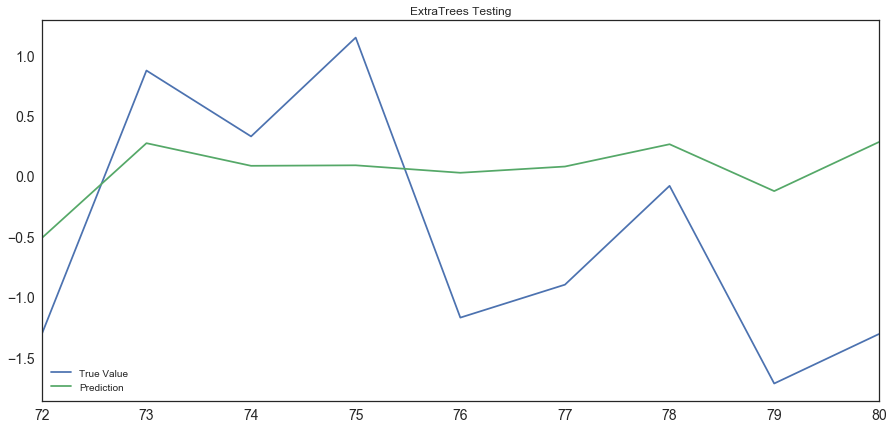

['G', 'FG', 'FGA', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'AST', 'STL', 'BLK', 'GmSc', 'PTS', 'Opp', 'Rest']
adj test r^2 = -0.4288477877725867
test mse = 1.0845126936942018


In [104]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['PredPts'].plot(figsize=(15,7), title= 'ExtraTrees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'ExtraTrees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y['PredPts'].plot(figsize=(15,7), title= 'ExtraTrees Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'ExtraTrees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))

### Random Forest

In [105]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.PredPts.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

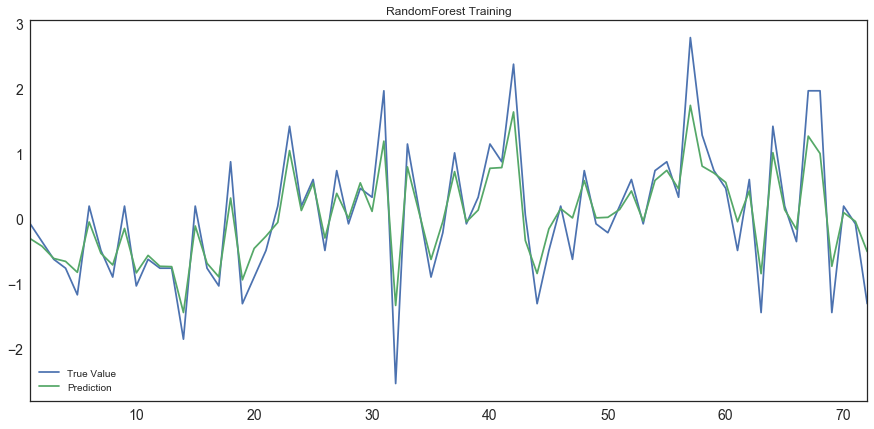

adj train r^2 = 0.8048824146932809
train mse = 0.15062973251594153


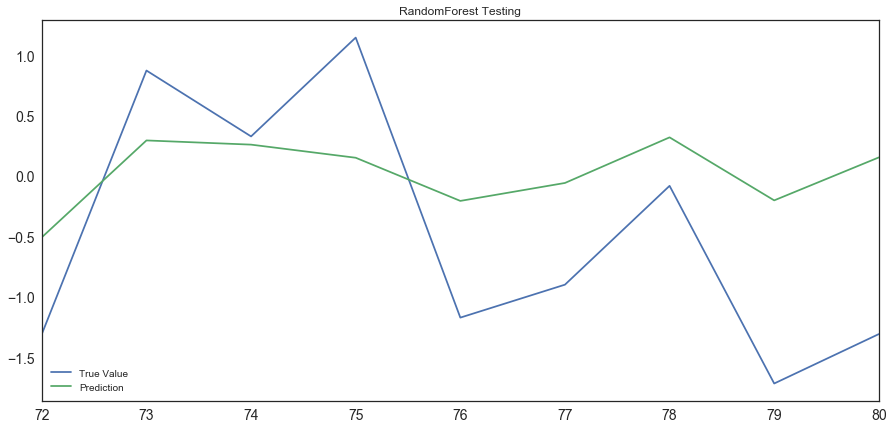

['G', 'FG', 'FGA', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'AST', 'STL', 'BLK', 'GmSc', 'PTS', 'Opp', 'Rest']
adj test r^2 = -0.20370865225856716
test mse = 0.9136293760995957


In [106]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['PredPts'].plot(figsize=(15,7), title= 'RandomForest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'RandomForest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y['PredPts'].plot(figsize=(15,7), title= 'RandomForest Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'RandomForest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))

### XGBoost

In [107]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=10000, learning_rate=0.001)
reg.fit(train_x.values, train_y.PredPts.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.001, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

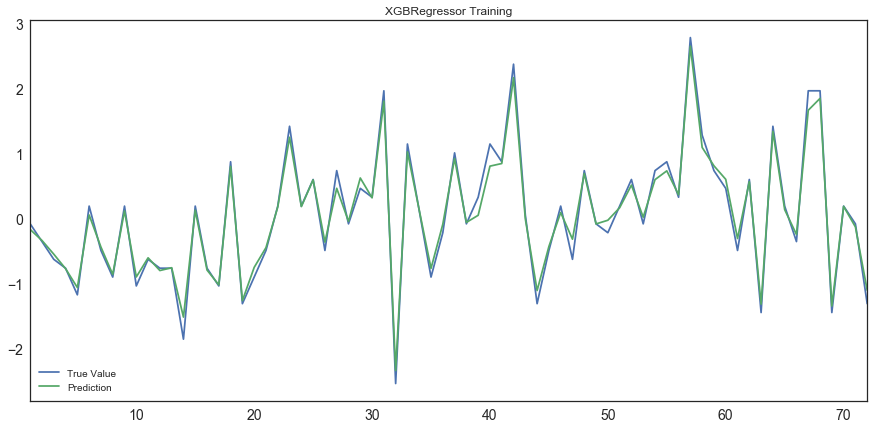

adj train r^2 = 0.9763807998513713
train mse = 0.018233896217174642


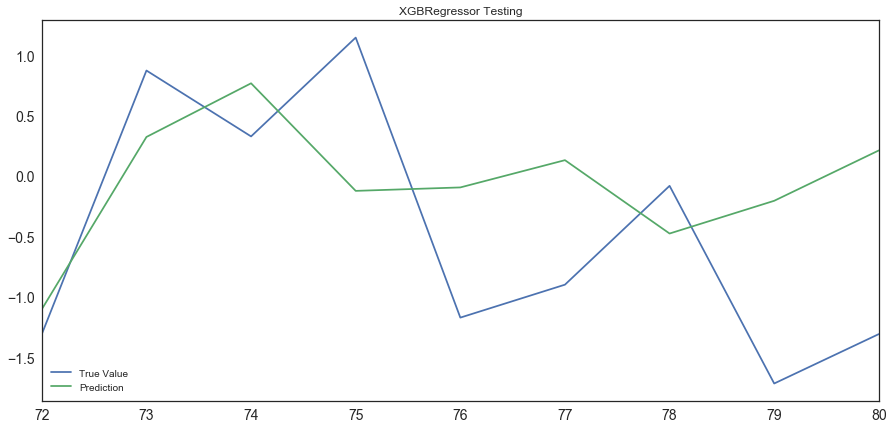

['G', 'FG', 'FGA', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'AST', 'STL', 'BLK', 'GmSc', 'PTS', 'Opp', 'Rest']
adj test r^2 = -0.33805719653573374
test mse = 1.0156015405909995


In [108]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['PredPts'].plot(figsize=(15,7), title= 'XGBRegressor Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBRegressor Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y['PredPts'].plot(figsize=(15,7), title= 'XGBRegressor Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'XGBRegressor Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))

### Neural Net

In [109]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [111]:
model = Sequential()
model.add(Dense(128, input_dim=16, activation='tanh',kernel_regularizer=regularizers.l2(0.23)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.13)))
model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.PredPts.values.ravel(), validation_data=[test_x.values, test_y['PredPts'].values.ravel()], epochs=500,verbose=1,shuffle=False)

Train on 71 samples, validate on 9 samples
Epoch 1/500
71/71 [==============================] - 1s 11ms/step - loss: 18.9684 - val_loss: 18.7570
Epoch 2/500
71/71 [==============================] - 0s 150us/step - loss: 18.2740 - val_loss: 18.2229
Epoch 3/500
71/71 [==============================] - 0s 143us/step - loss: 17.6024 - val_loss: 17.6983
Epoch 4/500
71/71 [==============================] - 0s 181us/step - loss: 17.0097 - val_loss: 17.1777
Epoch 5/500
71/71 [==============================] - 0s 153us/step - loss: 16.3949 - val_loss: 16.6772
Epoch 6/500
71/71 [==============================] - 0s 150us/step - loss: 15.7930 - val_loss: 16.1500
Epoch 7/500
71/71 [==============================] - 0s 167us/step - loss: 15.1095 - val_loss: 15.6168
Epoch 8/500
71/71 [==============================] - 0s 188us/step - loss: 14.6515 - val_loss: 15.0797
Epoch 9/500
71/71 [==============================] - 0s 179us/step - loss: 14.1141 - val_loss: 14.5511
Epoch 10/500
71/71 [===========

71/71 [==============================] - 0s 155us/step - loss: 1.7268 - val_loss: 2.6753
Epoch 81/500
71/71 [==============================] - 0s 187us/step - loss: 1.7269 - val_loss: 2.6563
Epoch 82/500
71/71 [==============================] - 0s 171us/step - loss: 1.7220 - val_loss: 2.6401
Epoch 83/500
71/71 [==============================] - 0s 180us/step - loss: 1.6828 - val_loss: 2.6286
Epoch 84/500
71/71 [==============================] - 0s 178us/step - loss: 1.6212 - val_loss: 2.6098
Epoch 85/500
71/71 [==============================] - 0s 190us/step - loss: 1.6239 - val_loss: 2.5964
Epoch 86/500
71/71 [==============================] - 0s 177us/step - loss: 1.6436 - val_loss: 2.5907
Epoch 87/500
71/71 [==============================] - 0s 150us/step - loss: 1.6095 - val_loss: 2.5783
Epoch 88/500
71/71 [==============================] - 0s 205us/step - loss: 1.5734 - val_loss: 2.5708
Epoch 89/500
71/71 [==============================] - 0s 178us/step - loss: 1.5648 - val_loss: 

Epoch 160/500
71/71 [==============================] - 0s 186us/step - loss: 1.1065 - val_loss: 2.6780
Epoch 161/500
71/71 [==============================] - 0s 154us/step - loss: 1.1352 - val_loss: 2.6382
Epoch 162/500
71/71 [==============================] - 0s 172us/step - loss: 1.0740 - val_loss: 2.5940
Epoch 163/500
71/71 [==============================] - 0s 180us/step - loss: 1.1104 - val_loss: 2.5749
Epoch 164/500
71/71 [==============================] - 0s 150us/step - loss: 1.1202 - val_loss: 2.5617
Epoch 165/500
71/71 [==============================] - 0s 141us/step - loss: 1.1083 - val_loss: 2.5550
Epoch 166/500
71/71 [==============================] - 0s 190us/step - loss: 1.0755 - val_loss: 2.5749
Epoch 167/500
71/71 [==============================] - 0s 175us/step - loss: 1.0884 - val_loss: 2.6046
Epoch 168/500
71/71 [==============================] - 0s 193us/step - loss: 1.1161 - val_loss: 2.6226
Epoch 169/500
71/71 [==============================] - 0s 172us/step - lo

71/71 [==============================] - 0s 180us/step - loss: 0.9996 - val_loss: 2.6040
Epoch 240/500
71/71 [==============================] - 0s 148us/step - loss: 0.9866 - val_loss: 2.6487
Epoch 241/500
71/71 [==============================] - 0s 172us/step - loss: 0.9573 - val_loss: 2.7091
Epoch 242/500
71/71 [==============================] - 0s 140us/step - loss: 0.9626 - val_loss: 2.7589
Epoch 243/500
71/71 [==============================] - 0s 156us/step - loss: 1.0259 - val_loss: 2.7164
Epoch 244/500
71/71 [==============================] - 0s 178us/step - loss: 0.9871 - val_loss: 2.6674
Epoch 245/500
71/71 [==============================] - 0s 161us/step - loss: 1.0027 - val_loss: 2.6517
Epoch 246/500
71/71 [==============================] - 0s 173us/step - loss: 0.9773 - val_loss: 2.6635
Epoch 247/500
71/71 [==============================] - 0s 173us/step - loss: 1.0125 - val_loss: 2.6782
Epoch 248/500
71/71 [==============================] - 0s 188us/step - loss: 0.9534 - v

71/71 [==============================] - 0s 192us/step - loss: 0.9387 - val_loss: 2.6433
Epoch 319/500
71/71 [==============================] - 0s 223us/step - loss: 0.9591 - val_loss: 2.7567
Epoch 320/500
71/71 [==============================] - 0s 174us/step - loss: 0.8913 - val_loss: 2.8600
Epoch 321/500
71/71 [==============================] - 0s 171us/step - loss: 0.9201 - val_loss: 2.9031
Epoch 322/500
71/71 [==============================] - 0s 166us/step - loss: 0.9068 - val_loss: 2.9059
Epoch 323/500
71/71 [==============================] - 0s 184us/step - loss: 0.9301 - val_loss: 2.8612
Epoch 324/500
71/71 [==============================] - 0s 177us/step - loss: 0.9230 - val_loss: 2.7782
Epoch 325/500
71/71 [==============================] - 0s 166us/step - loss: 0.9399 - val_loss: 2.7210
Epoch 326/500
71/71 [==============================] - 0s 189us/step - loss: 0.9029 - val_loss: 2.7274
Epoch 327/500
71/71 [==============================] - 0s 165us/step - loss: 0.9197 - v

71/71 [==============================] - 0s 202us/step - loss: 0.9218 - val_loss: 2.8956
Epoch 398/500
71/71 [==============================] - 0s 200us/step - loss: 0.9120 - val_loss: 2.8831
Epoch 399/500
71/71 [==============================] - 0s 165us/step - loss: 0.8820 - val_loss: 2.8562
Epoch 400/500
71/71 [==============================] - 0s 157us/step - loss: 0.9002 - val_loss: 2.8584
Epoch 401/500
71/71 [==============================] - 0s 208us/step - loss: 0.8906 - val_loss: 2.8894
Epoch 402/500
71/71 [==============================] - 0s 159us/step - loss: 0.9046 - val_loss: 2.9122
Epoch 403/500
71/71 [==============================] - 0s 226us/step - loss: 0.8749 - val_loss: 2.9003
Epoch 404/500
71/71 [==============================] - 0s 202us/step - loss: 0.8796 - val_loss: 2.9023
Epoch 405/500
71/71 [==============================] - 0s 193us/step - loss: 0.8746 - val_loss: 2.8827
Epoch 406/500
71/71 [==============================] - 0s 201us/step - loss: 0.8618 - v

71/71 [==============================] - 0s 144us/step - loss: 0.8860 - val_loss: 2.9573
Epoch 477/500
71/71 [==============================] - 0s 164us/step - loss: 0.8903 - val_loss: 2.9151
Epoch 478/500
71/71 [==============================] - 0s 191us/step - loss: 0.8771 - val_loss: 2.7263
Epoch 479/500
71/71 [==============================] - 0s 203us/step - loss: 0.8628 - val_loss: 2.5503
Epoch 480/500
71/71 [==============================] - 0s 177us/step - loss: 0.8907 - val_loss: 2.5086
Epoch 481/500
71/71 [==============================] - 0s 172us/step - loss: 0.8421 - val_loss: 2.5921
Epoch 482/500
71/71 [==============================] - 0s 155us/step - loss: 0.8686 - val_loss: 2.7226
Epoch 483/500
71/71 [==============================] - 0s 174us/step - loss: 0.8459 - val_loss: 2.7872
Epoch 484/500
71/71 [==============================] - 0s 212us/step - loss: 0.8828 - val_loss: 2.7982
Epoch 485/500
71/71 [==============================] - 0s 169us/step - loss: 0.8652 - v

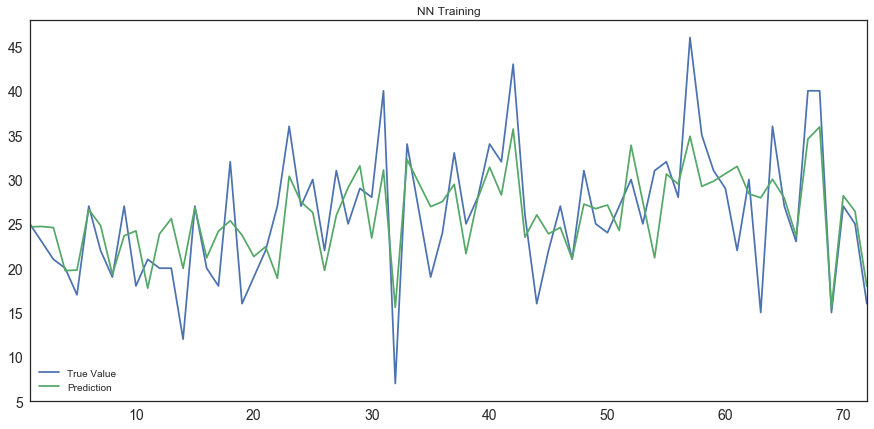

adj train r^2 = 0.43913050706935686
train mse = 0.4329882494378391


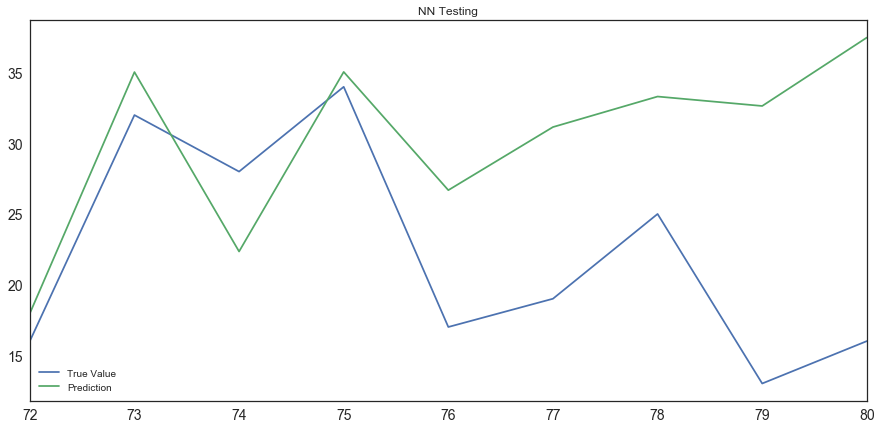

adj test r^2 = -2.282579655198813
test mse = 133.8041992785802


In [112]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['PredPts'] = sc2.inverse_transform(train_y2['PredPts'])
test_y2['PredPts'] = sc2.inverse_transform(test_y2['PredPts'])
train_y2['PredPts'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, model.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, model.predict(train_x.values))))
test_y2['PredPts'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))

In [113]:
test_y2.head()

,PredPts,PredTrb,PredAst,prediction
72,16.0,-0.754653,-0.819812,17.963308
73,32.0,-0.004574,-1.152607,35.043152
74,28.0,-1.129693,-0.487017,22.343628
75,34.0,-0.379613,0.178573,35.055000
76,17.0,-0.754653,0.178573,26.683954


### LSTM

In [114]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [115]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(600, input_shape=(1, train_x.values.shape[1]), activation='tanh',kernel_initializer='lecun_uniform',recurrent_regularizer=regularizers.l2(0.13)))
#model_lstm.add(LSTM(60, activation='relu',return_sequences=True))
#model_lstm.add(LSTM(60, activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(LSTM(60, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=15, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.PredPts.values.ravel(), validation_data=[X_tst_t, test_y['PredPts'].values.ravel()], epochs=50, verbose=1, shuffle=False)

Train on 71 samples, validate on 9 samples
Epoch 1/50
71/71 [==============================] - 2s 24ms/step - loss: 75.3231 - val_loss: 63.0208
Epoch 2/50
71/71 [==============================] - 0s 3ms/step - loss: 59.7163 - val_loss: 49.5965
Epoch 3/50
71/71 [==============================] - 0s 3ms/step - loss: 46.8223 - val_loss: 38.8174
Epoch 4/50
71/71 [==============================] - 0s 3ms/step - loss: 36.4200 - val_loss: 30.2671
Epoch 5/50
71/71 [==============================] - 0s 3ms/step - loss: 28.1977 - val_loss: 23.5907
Epoch 6/50
71/71 [==============================] - 0s 3ms/step - loss: 21.7838 - val_loss: 18.4030
Epoch 7/50
71/71 [==============================] - 0s 2ms/step - loss: 16.8010 - val_loss: 14.4424
Epoch 8/50
71/71 [==============================] - 0s 2ms/step - loss: 12.9930 - val_loss: 11.4104
Epoch 9/50
71/71 [==============================] - 0s 3ms/step - loss: 10.0746 - val_loss: 9.0940
Epoch 10/50
71/71 [==============================] - 0s 3

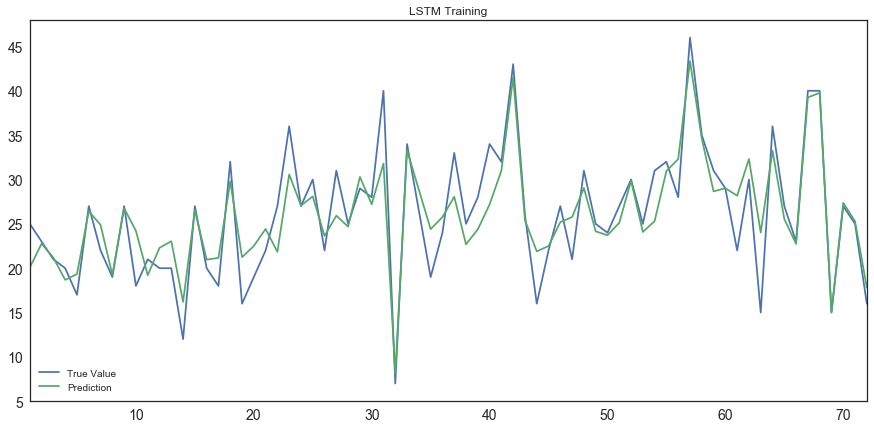

adj train r^2 = 0.7506869591725391
train mse = 0.19246833438176641


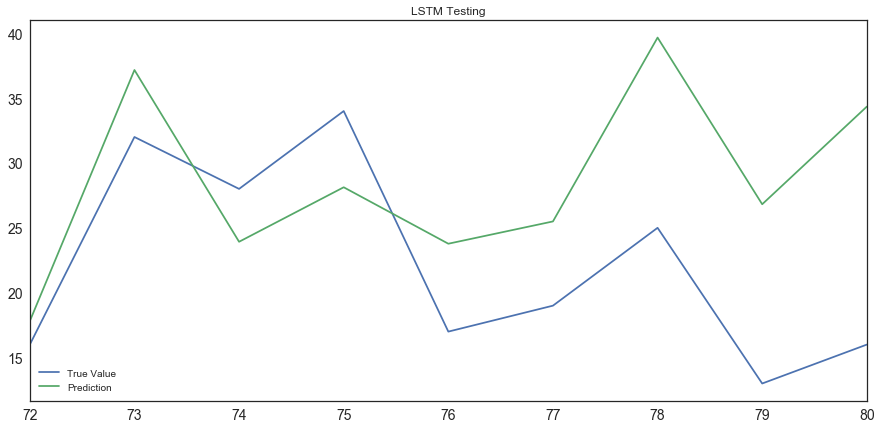

adj test r^2 = -1.4845526803296765
test mse = 101.27509973153347


In [116]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['PredPts'] = sc2.inverse_transform(train_y2['PredPts'])
test_y2['PredPts'] = sc2.inverse_transform(test_y2['PredPts'])
train_y2['PredPts'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, model_lstm.predict(X_tr_t))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, model_lstm.predict(X_tr_t))))
test_y2['PredPts'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))

In [117]:
test_y2.head()

,PredPts,PredTrb,PredAst,prediction
72,16.0,-0.754653,-0.819812,17.810167
73,32.0,-0.004574,-1.152607,37.163570
74,28.0,-1.129693,-0.487017,23.924406
75,34.0,-0.379613,0.178573,28.125736
76,17.0,-0.754653,0.178573,23.774677


### TPOT

In [119]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=5, max_time_mins=2, verbosity=1, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.PredPts.values.ravel())


2.0032061000000003 minutes have elapsed. TPOT will close down.
TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: DecisionTreeRegressor(PCA(RobustScaler(VarianceThreshold(MaxAbsScaler(input_matrix), threshold=0.2)), iterated_power=3, svd_solver=randomized), max_depth=5, min_samples_leaf=15, min_samples_split=17)


TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=2, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=5,
       random_state=None, scoring=None, subsample=1.0, use_dask=False,
       verbosity=1, warm_start=False)

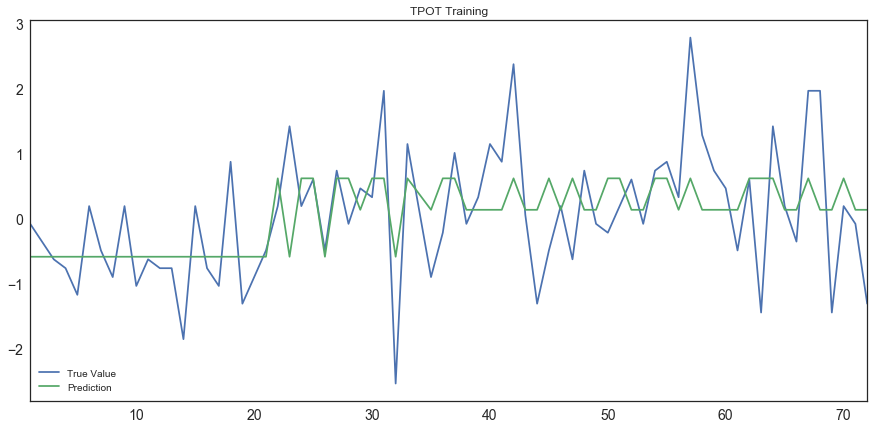

adj train r^2 = 0.0204502216914767
train mse = 0.7562071909649736


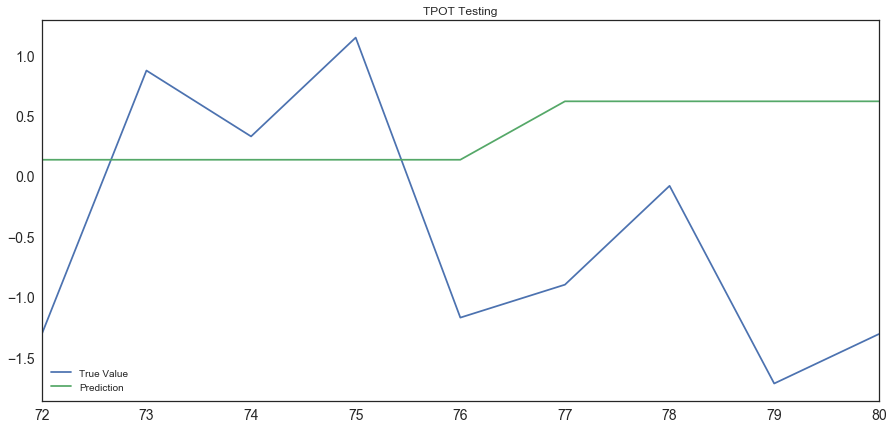

adj test r^2 = -1.5446698519038704
test mse = 1.9314350900544812


In [120]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = tpot.predict(train_x.values)
test_y['prediction'] = tpot.predict(test_x.values)
train_y2['PredPts'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, train_y2.prediction)))
test_y['PredPts'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))